### 1. Read the data as an appropriate Time Series data and plot the data.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Sparkling.csv')
data.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [3]:
data.shape

(187, 2)

In [4]:
data.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [5]:
date = pd.date_range(start='1980/1/1', end='1995/8/1', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [6]:
data['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
data.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [7]:
data['Time_Stamp'] = pd.to_datetime(data['Time_Stamp'])


In [8]:
data = data.set_index('Time_Stamp')
data.drop(['YearMonth'], axis=1, inplace=True)
data.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


## Plotting the Time Series to understand the behaviour of the data

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

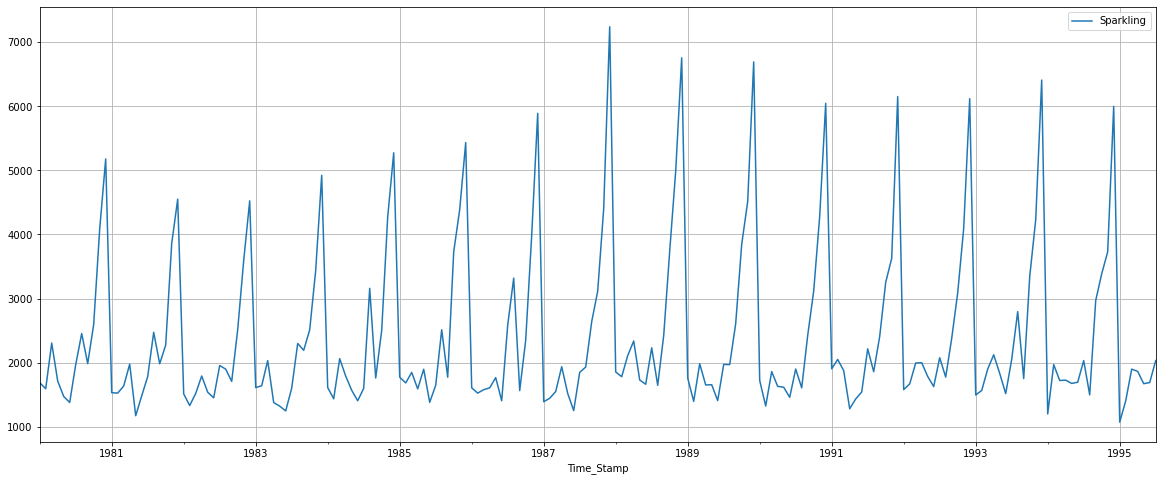

In [10]:
data.plot(figsize=(20,8))
plt.grid();

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.


In [11]:
data.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [12]:
### plot a boxplot to understand the spread of sales across different years and within different months across years.

In [13]:
##### yearly boxplot

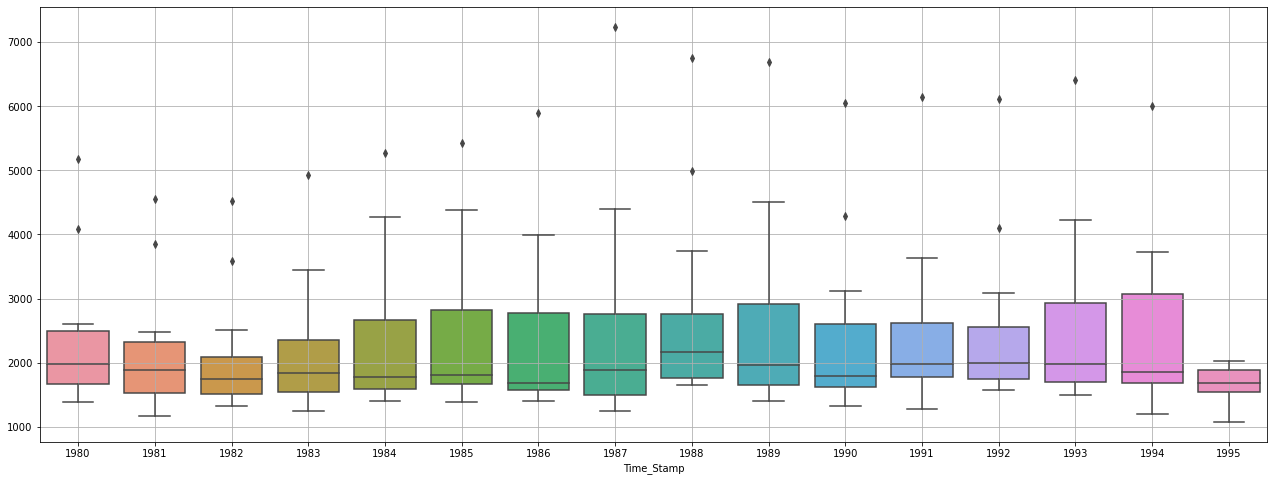

In [14]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = data.index.year,y = data.values[:,0],ax=ax)
plt.grid();

The yearly boxplots shows uneven distribution towards the last few years.

In [15]:
##### Monthly Boxplot

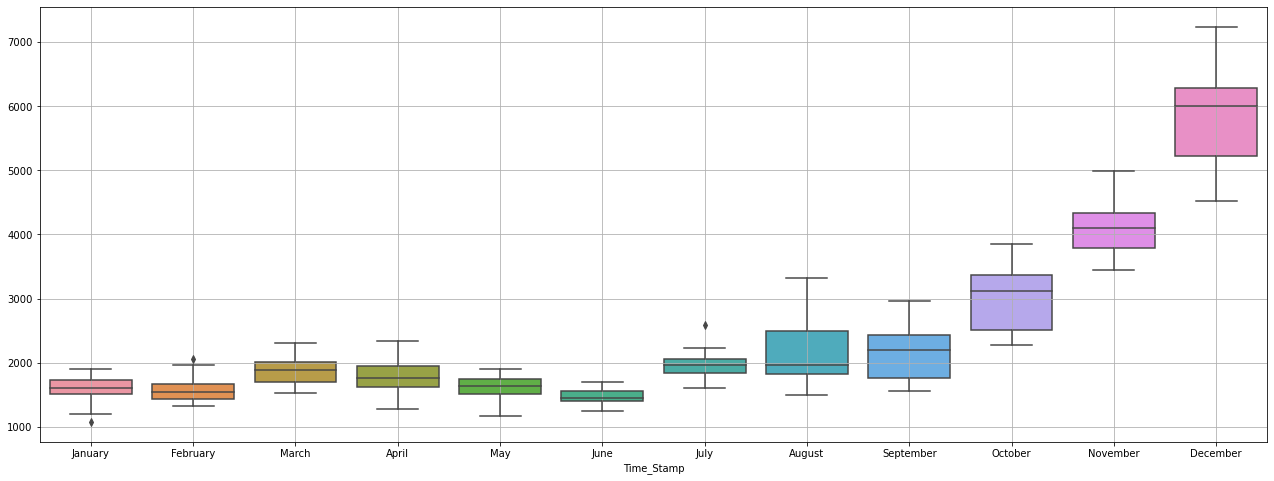

In [16]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = data.index.month_name(),y = data.values[:,0],ax=ax)
plt.grid();

There is a clear distinction of sparkling wine Sales within different months spread across various years. The lowest is in june and the highest is in december

In [17]:
#### Plot a graph of monthly sales across years.

In [18]:
monthly_sales_across_years = pd.pivot_table(data, values = 'Sparkling', columns = data.index.month_name(), index = data.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
1980,1712.0,2453.0,5179.0,1591.0,1686.0,1966.0,1377.0,2304.0,1471.0,4087.0,2596.0,1984.0
1981,1976.0,2472.0,4551.0,1523.0,1530.0,1781.0,1480.0,1633.0,1170.0,3857.0,2273.0,1981.0
1982,1790.0,1897.0,4524.0,1329.0,1510.0,1954.0,1449.0,1518.0,1537.0,3593.0,2514.0,1706.0
1983,1375.0,2298.0,4923.0,1638.0,1609.0,1600.0,1245.0,2030.0,1320.0,3440.0,2511.0,2191.0
1984,1789.0,3159.0,5274.0,1435.0,1609.0,1597.0,1404.0,2061.0,1567.0,4273.0,2504.0,1759.0
1985,1589.0,2512.0,5434.0,1682.0,1771.0,1645.0,1379.0,1846.0,1896.0,4388.0,3727.0,1771.0
1986,1605.0,3318.0,5891.0,1523.0,1606.0,2584.0,1403.0,1577.0,1765.0,3987.0,2349.0,1562.0
1987,1935.0,1930.0,7242.0,1442.0,1389.0,1847.0,1250.0,1548.0,1518.0,4405.0,3114.0,2638.0
1988,2336.0,1645.0,6757.0,1779.0,1853.0,2230.0,1661.0,2108.0,1728.0,4988.0,3740.0,2421.0


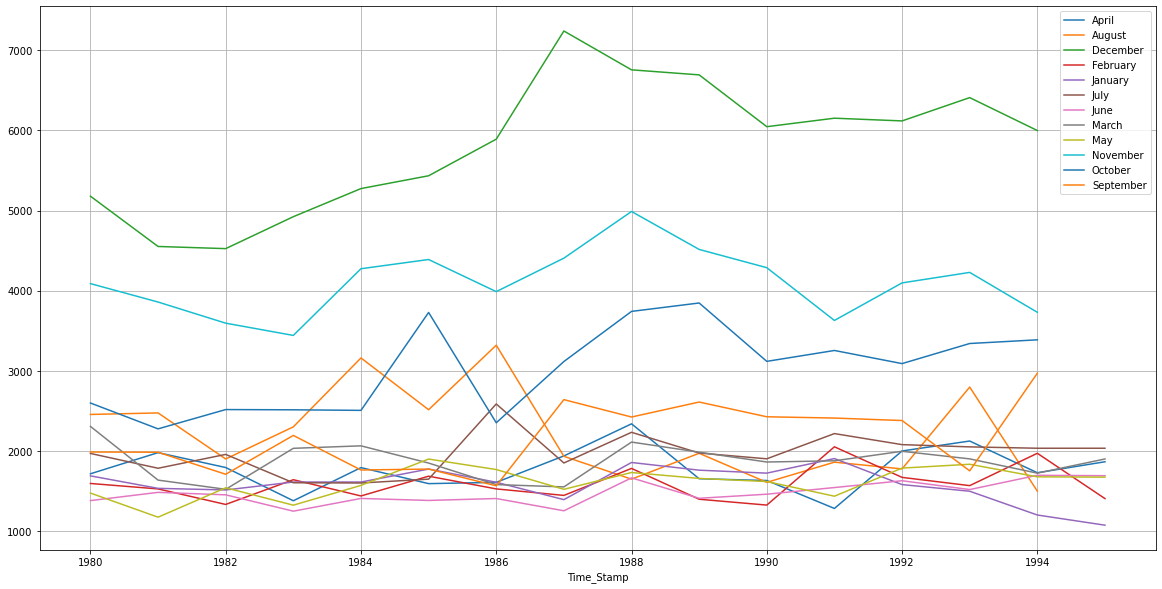

In [19]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

#### Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.¶


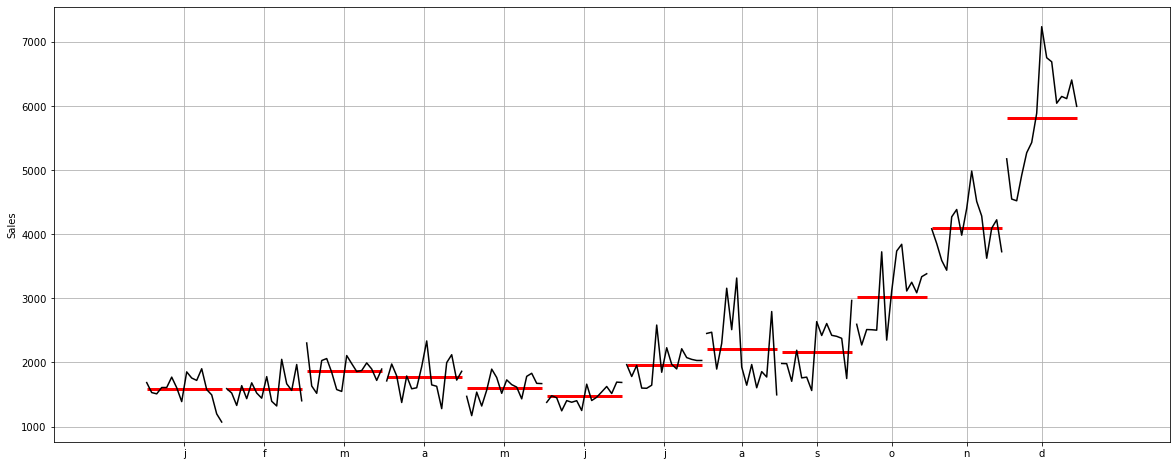

In [20]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(data['Sparkling'],ylabel='Sales')
plt.grid();

This plot shows us the behaviour of the Time Series ('sparkling_Sales' in this case) across various months. The red line is the median value.

In [21]:
### Plot the Empirical Cumulative Distribution.

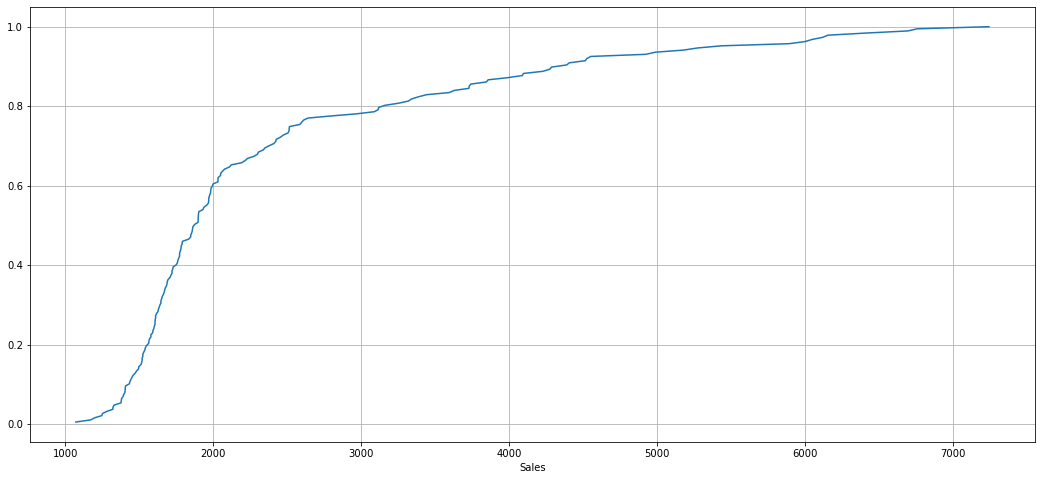

In [22]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(data['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales.



In [23]:
### Plot the average sparkling_Sales per month and the month on month percentage change of sparkling_Sales.

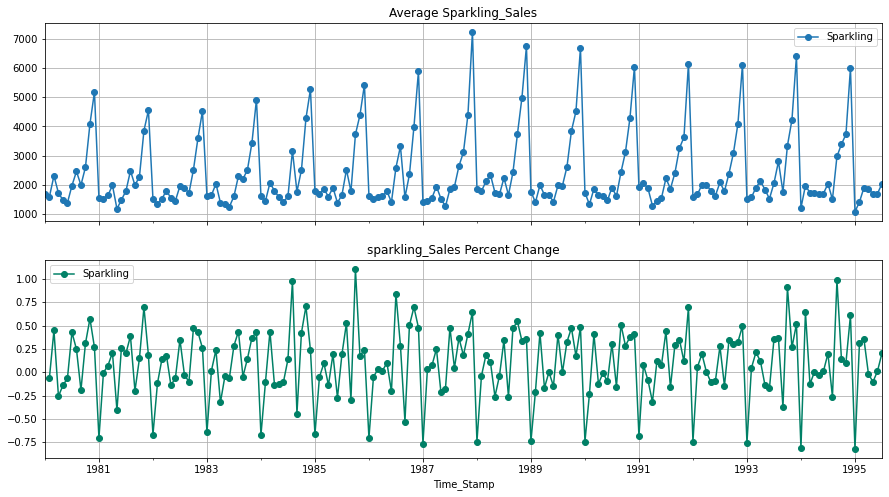

In [24]:
# group by date and get average sparkling_Sales, and precent change

average    = data.groupby(data.index)["Sparkling"].mean()
pct_change = data.groupby(data.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sparkling_Sales over time(year-month)

ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling_Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# plot precent change for sparkling_Sales over time(year-month)

ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="sparkling_Sales Percent Change",grid=True)

The above two graphs tells us the Average 'sparkling_Sales' and the Percentage change of 'sparkling_Sales' with respect to the time.

#### Decompose the Time Series and plot the different components.

In [25]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

In [26]:
# Additive Decomposition

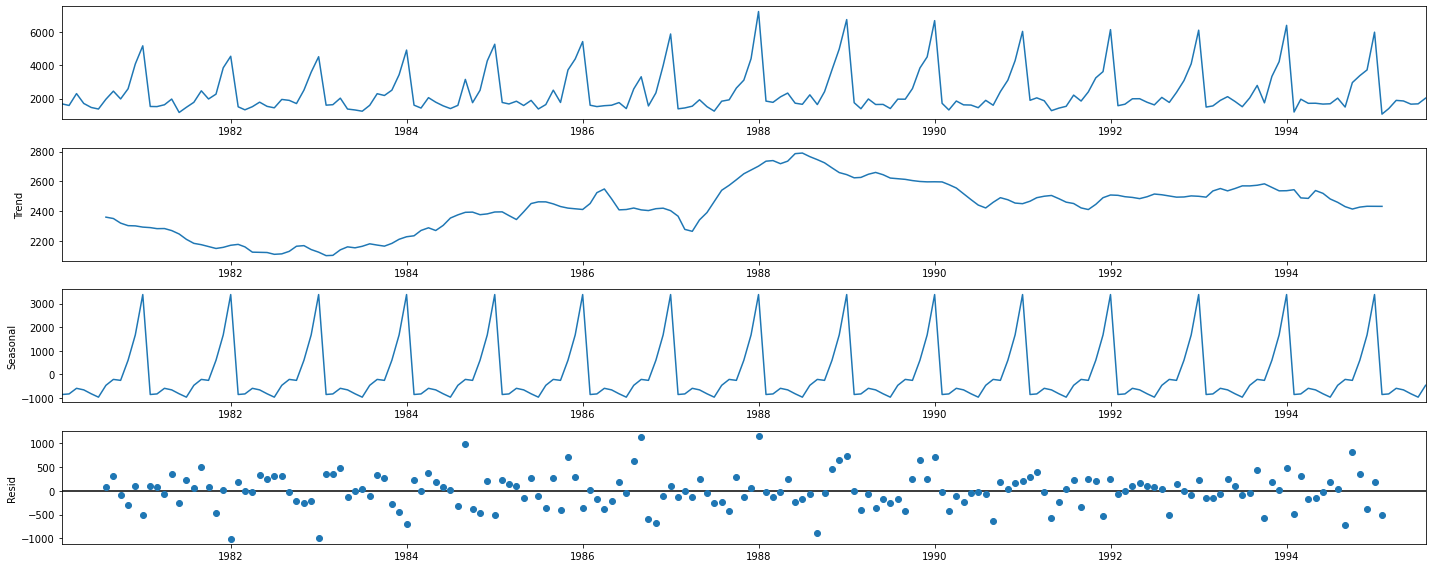

In [27]:
decomposition = seasonal_decompose(data,model='additive')
decomposition.plot();

We see that the residuals have a pattern in this decomposition.

In [28]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

In [29]:
### Multiplicative Decomposition

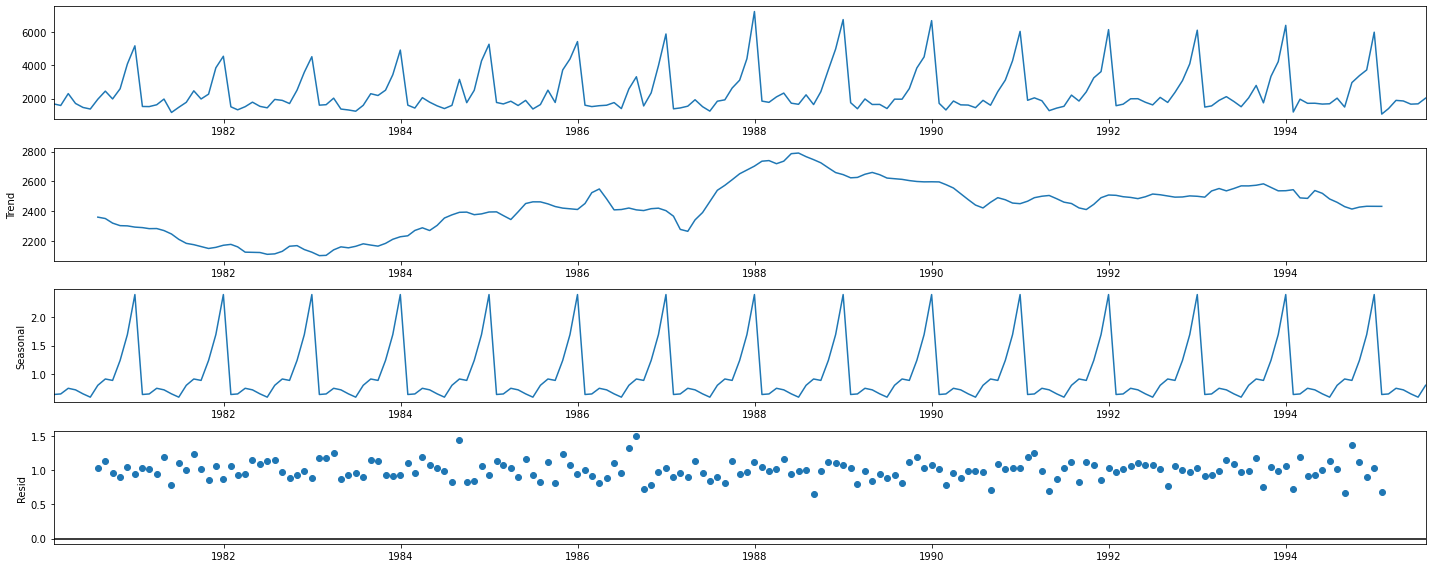

In [30]:
decomposition = seasonal_decompose(data,model='multiplicative')
decomposition.plot();

In [31]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

For the multiplicative series, we see that a lot of residuals are located around 1.

### 3. Split the data into training and test. The test data should start in 1991.


In [32]:
## Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [33]:
data.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='Time_Stamp')

In [34]:
train = data[data.index<='1991'] 
test = data[data.index>'1991']

In [35]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [36]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [37]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [38]:
# Printing the Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471
...,...
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116


Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432
1991-06-30,1540
1991-07-31,2214
1991-08-31,1857
1991-09-30,2408


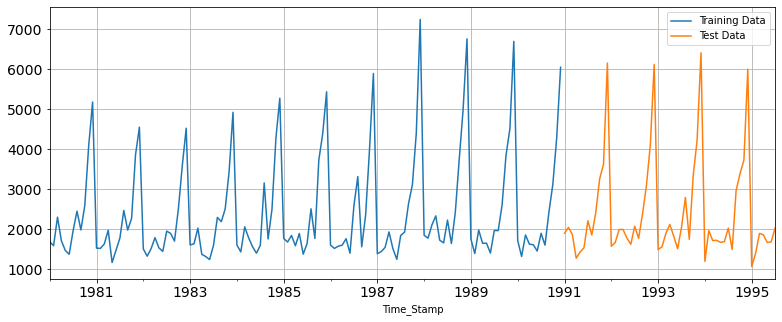

In [39]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE. Please do try to build as many models as possible and as many iterations of models as possible with different parameters.


In [40]:
import statsmodels.tools.eval_measures as em
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from IPython.display import display
from pylab import rcParams

In [41]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [42]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [43]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07029459943040381,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.1004162520212,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Here, Python has optimized the smoothing level to be 0.07

In [44]:
# Using the fitted model on the training set to forecast on the test set

SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    2804.687529
1991-02-28    2804.687529
1991-03-31    2804.687529
1991-04-30    2804.687529
1991-05-31    2804.687529
1991-06-30    2804.687529
1991-07-31    2804.687529
1991-08-31    2804.687529
1991-09-30    2804.687529
1991-10-31    2804.687529
1991-11-30    2804.687529
1991-12-31    2804.687529
1992-01-31    2804.687529
1992-02-29    2804.687529
1992-03-31    2804.687529
1992-04-30    2804.687529
1992-05-31    2804.687529
1992-06-30    2804.687529
1992-07-31    2804.687529
1992-08-31    2804.687529
1992-09-30    2804.687529
1992-10-31    2804.687529
1992-11-30    2804.687529
1992-12-31    2804.687529
1993-01-31    2804.687529
1993-02-28    2804.687529
1993-03-31    2804.687529
1993-04-30    2804.687529
1993-05-31    2804.687529
1993-06-30    2804.687529
1993-07-31    2804.687529
1993-08-31    2804.687529
1993-09-30    2804.687529
1993-10-31    2804.687529
1993-11-30    2804.687529
1993-12-31    2804.687529
1994-01-31    2804.687529
1994-02-28    2804.687529
1994-03-31  

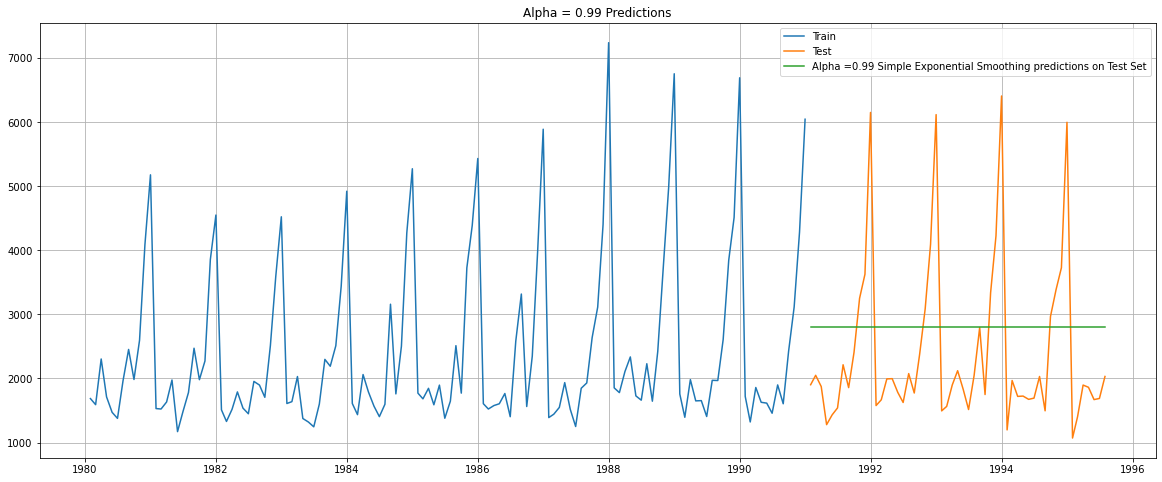

In [45]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [46]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [47]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1338.0121443910186
SES RMSE (calculated using statsmodels): 1338.0121443910189


In [48]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.012144


### Holt - ETS(A, A, N) - Holt's linear method with additive errors
### Double Exponential Smoothing


In [49]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6638769092832238, 'smoothing_trend': 9.966251357628782e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.5681711003654, 'initial_trend': 29.020225552837097, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [50]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    5330.501799
1991-02-28    5359.520204
1991-03-31    5388.538609
1991-04-30    5417.557013
1991-05-31    5446.575418
1991-06-30    5475.593823
1991-07-31    5504.612228
1991-08-31    5533.630633
1991-09-30    5562.649038
1991-10-31    5591.667443
1991-11-30    5620.685847
1991-12-31    5649.704252
1992-01-31    5678.722657
1992-02-29    5707.741062
1992-03-31    5736.759467
1992-04-30    5765.777872
1992-05-31    5794.796277
1992-06-30    5823.814682
1992-07-31    5852.833086
1992-08-31    5881.851491
1992-09-30    5910.869896
1992-10-31    5939.888301
1992-11-30    5968.906706
1992-12-31    5997.925111
1993-01-31    6026.943516
1993-02-28    6055.961920
1993-03-31    6084.980325
1993-04-30    6113.998730
1993-05-31    6143.017135
1993-06-30    6172.035540
1993-07-31    6201.053945
1993-08-31    6230.072350
1993-09-30    6259.090754
1993-10-31    6288.109159
1993-11-30    6317.127564
1993-12-31    6346.145969
1994-01-31    6375.164374
1994-02-28    6404.182779
1994-03-31  

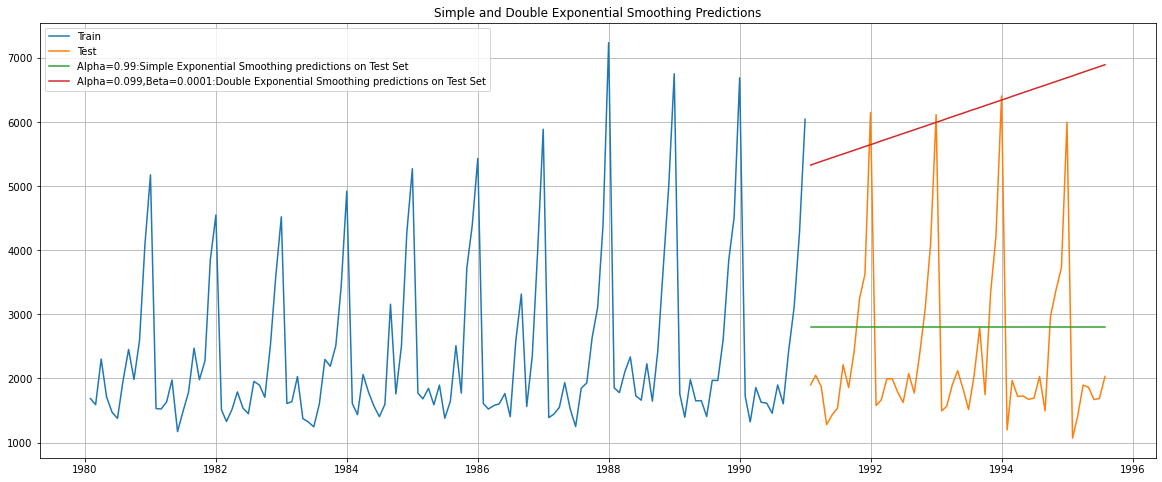

In [51]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [52]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 3949.993290409098


In [53]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.012144
"Alpha=1,Beta=0.0189:DES",3949.993290


### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [54]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127217750369374, 'smoothing_trend': 0.012360783181435476, 'smoothing_seasonal': 0.46071776535363884, 'damping_trend': nan, 'initial_level': 2356.5783644431663, 'initial_trend': -0.018472685444676173, 'initial_seasons': array([-636.2336051 , -722.98357701, -398.64355469, -473.43067518,
       -808.42508554, -815.35030576, -384.23066985,   72.99519329,
       -237.44272885,  272.32601496, 1541.37820977, 2590.07759464]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [55]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31    1490.574554
1991-02-28    1204.714465
1991-03-31    1688.941260
1991-04-30    1551.450976
1991-05-31    1461.440607
1991-06-30    1278.907356
1991-07-31    1805.164228
1991-08-31    1679.251610
1991-09-30    2315.687881
1991-10-31    3225.309152
1991-11-30    4299.652620
1991-12-31    6411.161665
1992-01-31    1483.296924
1992-02-29    1197.436835
1992-03-31    1681.663630
1992-04-30    1544.173346
1992-05-31    1454.162977
1992-06-30    1271.629725
1992-07-31    1797.886598
1992-08-31    1671.973980
1992-09-30    2308.410251
1992-10-31    3218.031522
1992-11-30    4292.374990
1992-12-31    6403.884035
1993-01-31    1476.019294
1993-02-28    1190.159205
1993-03-31    1674.386000
1993-04-30    1536.895716
1993-05-31    1446.885347
1993-06-30    1264.352095
1993-07-31    1790.608968
1993-08-31    1664.696350
1993-09-30    2301.132621
1993-10-31    3210.753892
1993-11-30    4285.097360
1993-12-31    6396.606405
1994-01-31    1468.741664
1994-02-28    1182.881575
1994-03-31  

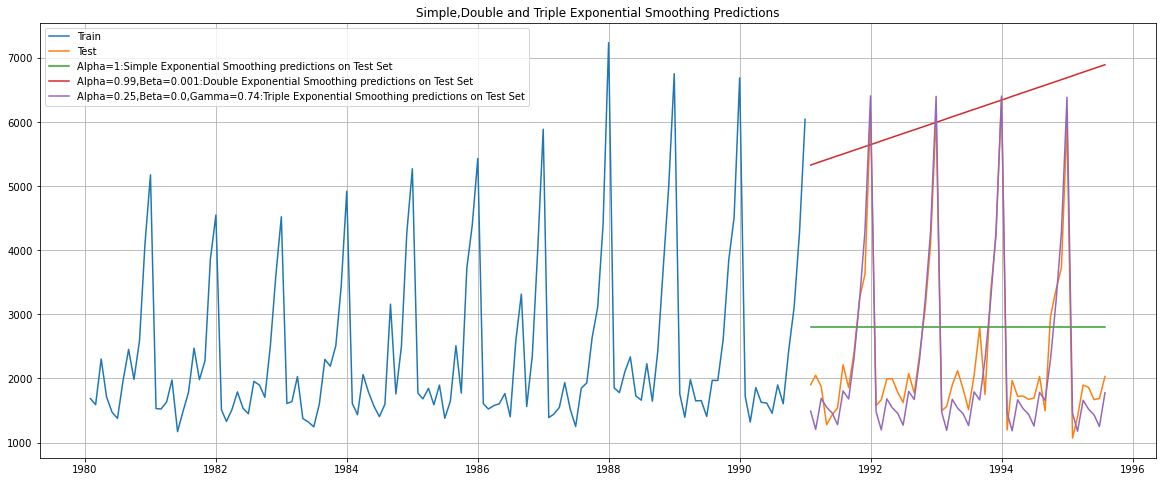

In [56]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [57]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 378.6260018715533


In [58]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.012144
"Alpha=1,Beta=0.0189:DES",3949.993290
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",378.626002


### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method 

In [59]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11210697436046972, 'smoothing_trend': 0.049874926058466156, 'smoothing_seasonal': 0.36157546459896645, 'damping_trend': nan, 'initial_level': 2356.1883621937372, 'initial_trend': -10.716106870545397, 'initial_seasons': array([0.71387046, 0.68468823, 0.90230077, 0.80726787, 0.65829434,
       0.65856525, 0.8849729 , 1.13191171, 0.92267676, 1.2102115 ,
       1.87959852, 2.38644808]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [60]:

# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31    1586.558206
1991-02-28    1355.750682
1991-03-31    1761.851375
1991-04-30    1655.269521
1991-05-31    1541.136145
1991-06-30    1354.319129
1991-07-31    1853.068954
1991-08-31    1819.869562
1991-09-30    2275.649057
1991-10-31    3119.773141
1991-11-30    4125.403336
1991-12-31    5883.710561
1992-01-31    1536.544075
1992-02-29    1312.899883
1992-03-31    1706.018015
1992-04-30    1602.674863
1992-05-31    1492.037966
1992-06-30    1311.057793
1992-07-31    1793.717947
1992-08-31    1761.425892
1992-09-30    2202.372287
1992-10-31    3019.044963
1992-11-30    3991.847011
1992-12-31    5692.715303
1993-01-31    1486.529944
1993-02-28    1270.049083
1993-03-31    1650.184655
1993-04-30    1550.080205
1993-05-31    1442.939786
1993-06-30    1267.796458
1993-07-31    1734.366939
1993-08-31    1702.982222
1993-09-30    2129.095518
1993-10-31    2918.316785
1993-11-30    3858.290686
1993-12-31    5501.720044
1994-01-31    1436.515813
1994-02-28    1227.198283
1994-03-31  

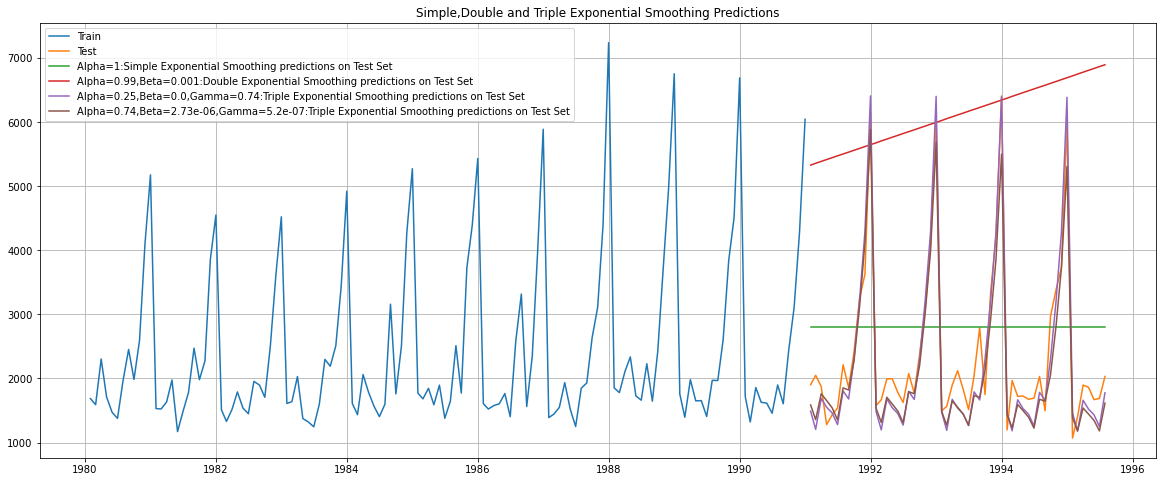

In [61]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [62]:
### Report model accuracy

In [63]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 407.1255048267285


In [64]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.012144
"Alpha=1,Beta=0.0189:DES",3949.993290
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",378.626002
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",407.125505


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.



### Building different models and comparing the accuracy metrics.
### Model 1: Linear Regression
For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [65]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set

In [66]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [67]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902    43
1991-02-28       2049    44
1991-03-31       1874    45
1991-04-30       1279    46
1991-05-31       1432    47 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897    93
1995-04-30       1862    94
1995-05-31       1670    95
1995-06-30       1688    96
1995-07-31       2031    97 



Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖on  to build the model on the training data and test the model on the test data.

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression()

In [70]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

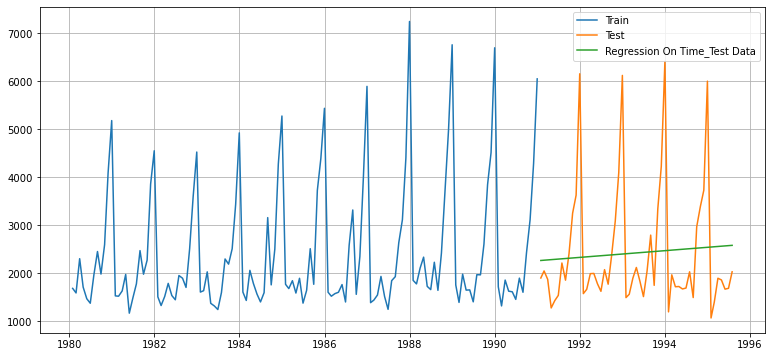

In [71]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [72]:
##### Defining the accuracy metrics.

In [73]:
from sklearn import metrics

In [74]:
# Model Evaluation

In [75]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1275.867


In [76]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052


### Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [77]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [78]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

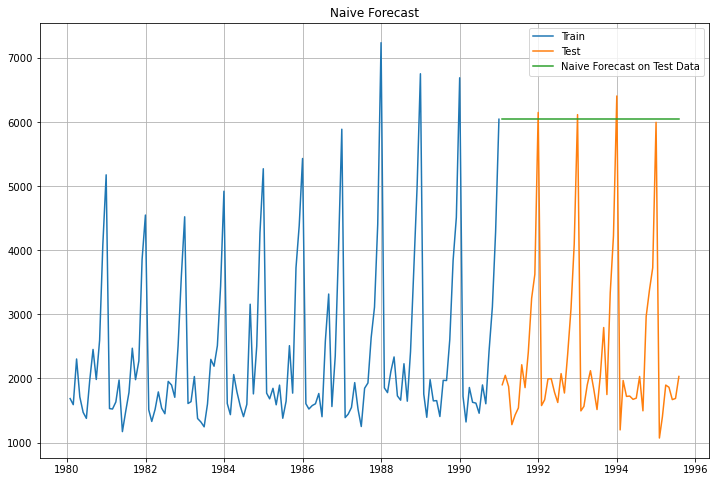

In [79]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [80]:
### Model Evaluation

In [81]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [82]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352


### Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [83]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [84]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


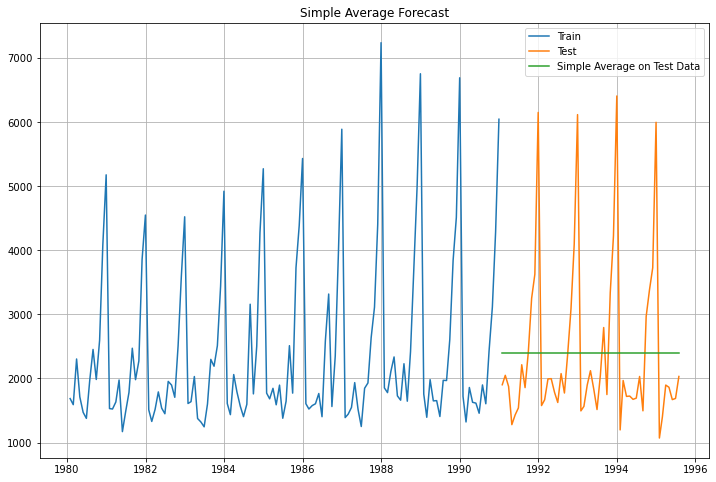

In [85]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [86]:
## Model Evaluation

In [87]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [88]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.
Let us plot the training data once.

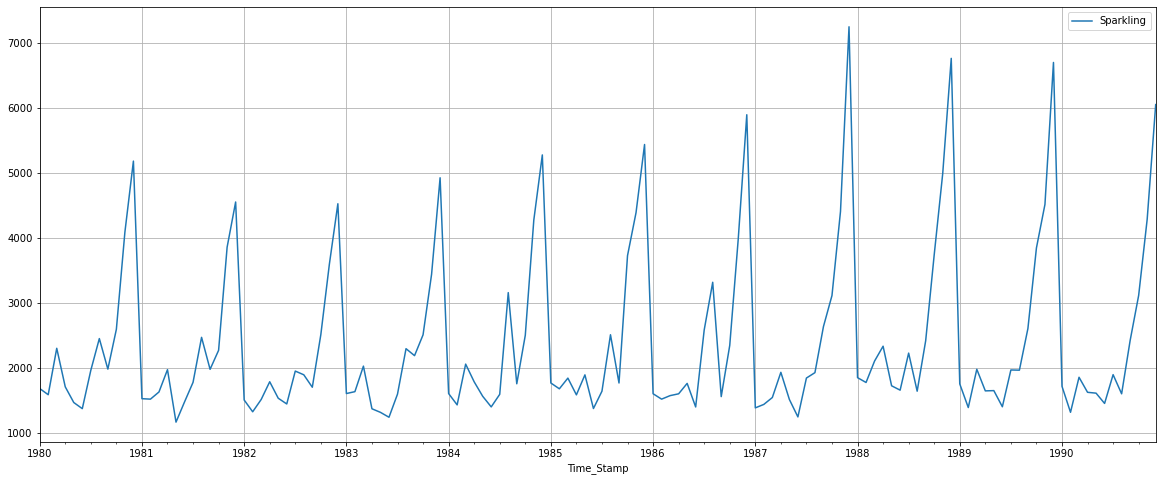

In [89]:
train.plot(grid=True);

In [90]:
from statsmodels.tsa.stattools import adfuller

In [91]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593658
Number of lags used 12


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [92]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655514148e-11
Number of lags used 11


Now, let us go ahead and plot the differenced training data.

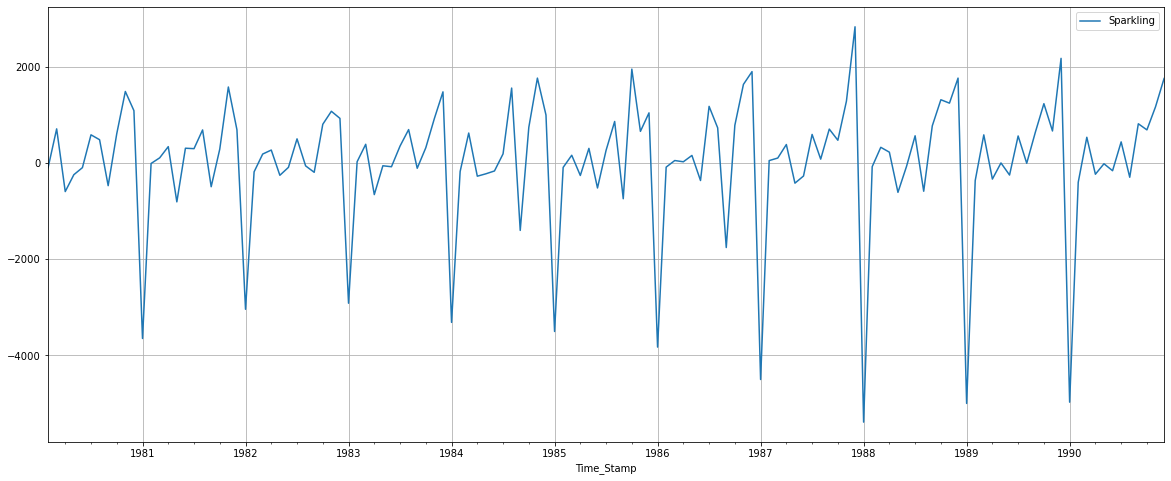

In [93]:
train.diff().dropna().plot(grid=True);

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.



In [95]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [96]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [97]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.4083231278064
ARIMA(0, 1, 3) - AIC:2233.99485774639
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946742404
ARIMA(1, 1, 2) - AIC:2234.5272004510443
ARIMA(1, 1, 3) - AIC:2235.6078135674784
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.7776262581274
ARIMA(2, 1, 2) - AIC:2213.5092125121946


C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2232.79892996322
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.5004683610605


C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 1, 2) - AIC:2230.7762506960107
ARIMA(3, 1, 3) - AIC:2221.4516382573047


C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [98]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2213.509213
15,"(3, 1, 3)",2221.451638
14,"(3, 1, 2)",2230.776251
11,"(2, 1, 3)",2232.798930
9,"(2, 1, 1)",2233.777626


In [99]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 04 Apr 2021   AIC                           2213.509
Time:                        14:08:32   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.216      0.0

In [100]:
## Diagnostics plot

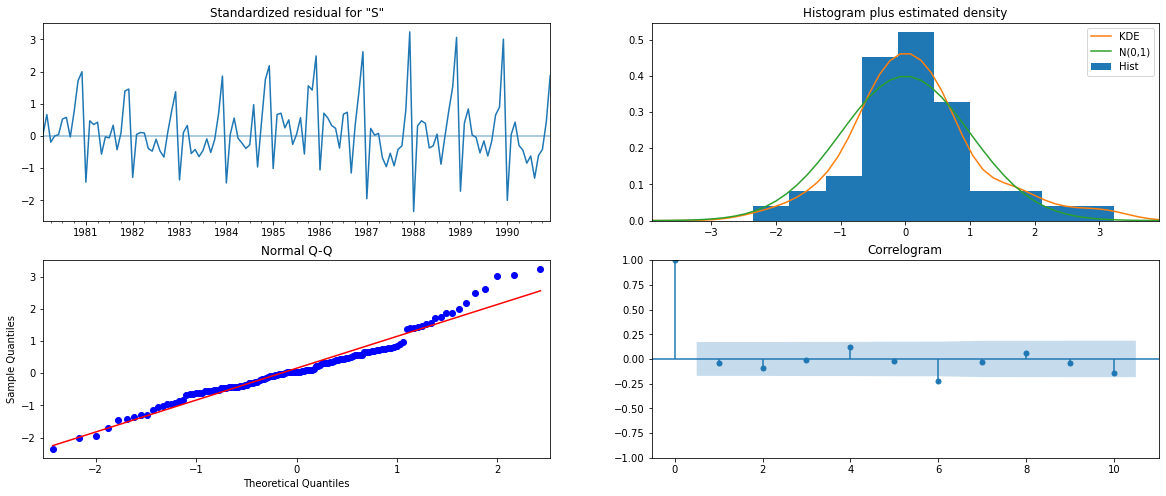

In [101]:
results_auto_ARIMA.plot_diagnostics();

In [102]:
### Predict on the Test Set using this model and evaluate the model.

In [103]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [104]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [105]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1299.9792109476211 
MAPE: 47.09993672423747


In [106]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979211,47.099937


### SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).
Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

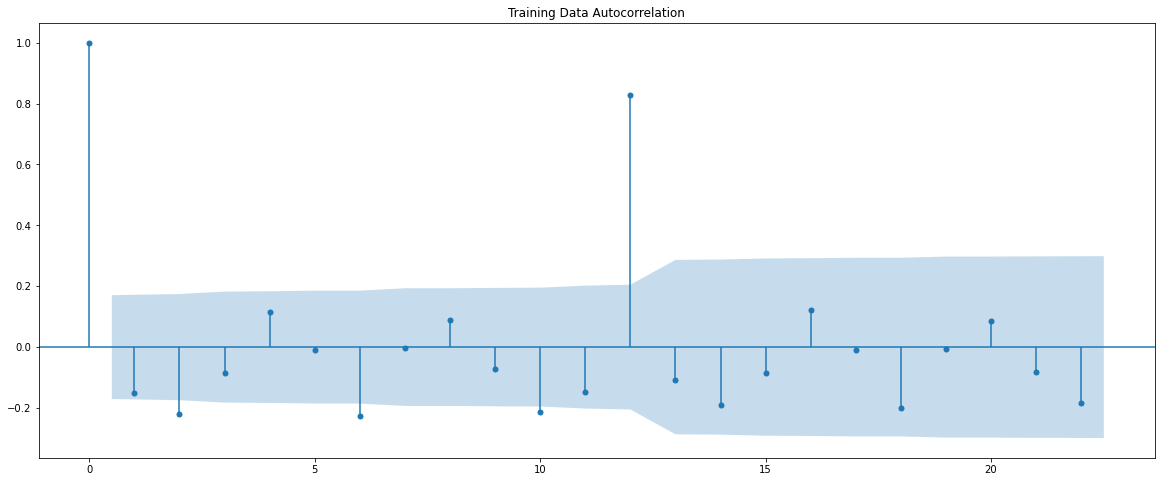

In [109]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

We can see that there is a seasonality.

In [110]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [111]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [112]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716284
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890933
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.7845154973274
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559984442563
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111185642
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.3929094830419
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.199361751051
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657487
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.5376425549007
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1748.7622668155268
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.6879953816554
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.448985803108
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.0138759535382
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505825
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.5652859082847
SARIMA(0, 1, 1)x(0, 0, 2, 6) - 

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1763.1914589558787
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1743.8742069625332
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:1661.5700228406097
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:1676.1994485026514
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:1703.1231137213329
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:1661.3367158077926
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:1663.331547014896
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2176.868114688141
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:2068.7780944519573
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1889.7875404654014
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1797.0726418522595
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2074.1102217500147
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1955.605896297144
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1826.0433954137
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1714.4016918084942
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1763.274775274491
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1760.8267450584606
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1752.2758266821847
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC:

In [113]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",1629.051874
191,"(2, 1, 3)","(3, 0, 3, 6)",1630.860175
59,"(0, 1, 3)","(2, 0, 3, 6)",1633.327915
123,"(1, 1, 3)","(2, 0, 3, 6)",1633.965755
251,"(3, 1, 3)","(2, 0, 3, 6)",1634.617377


In [114]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -807.582
Date:                           Sun, 04 Apr 2021   AIC                           1637.163
Time:                                   14:14:02   BIC                           1666.768
Sample:                               01-31-1980   HQIC                          1649.169
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3070      0.567      0.542      0.588      -0.804       1.418
ma.L1         -2.3221      0.883     -2.631

insignificant - coefficients are negative

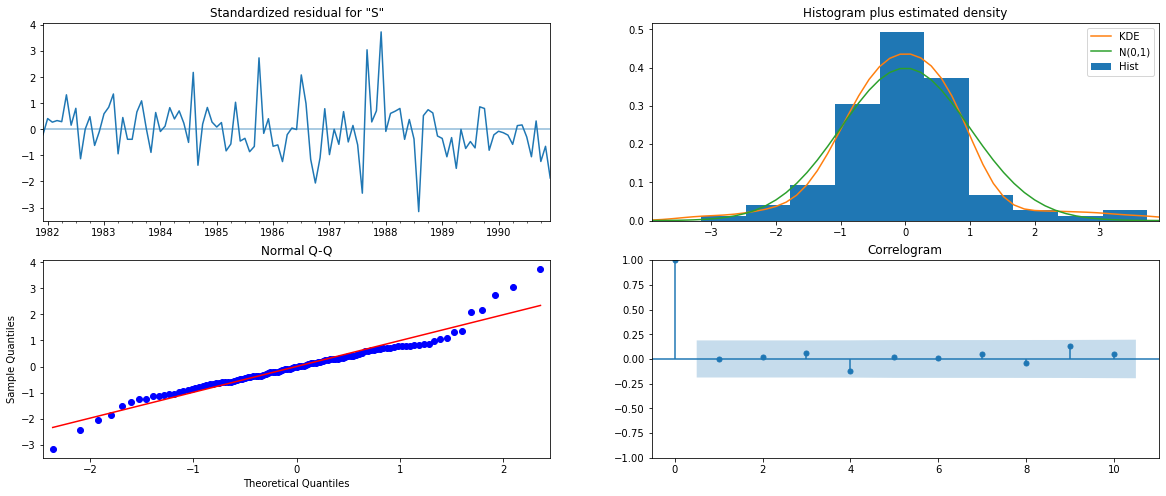

In [115]:
results_auto_SARIMA.plot_diagnostics();

In [116]:
## Predict on the Test Set using this model and evaluate the model.

In [117]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [118]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-31,1356.625164,392.290573,587.749769,2125.500559
1991-02-28,1088.155442,402.609098,299.056111,1877.254773
1991-03-31,1616.361667,402.635893,827.209817,2405.513516
1991-04-30,1452.699860,405.154242,658.612138,2246.787582
1991-05-31,1189.303428,409.670081,386.364823,1992.242034


In [119]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 874.0586043248644 
MAPE: 38.90357650772346


In [120]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,3)(3,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979211,47.099937
"SARIMA(1,1,3)(3,0,3,6)",874.058604,38.903577


## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
Let us look at the ACF and the PACF plots once more.

In [121]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

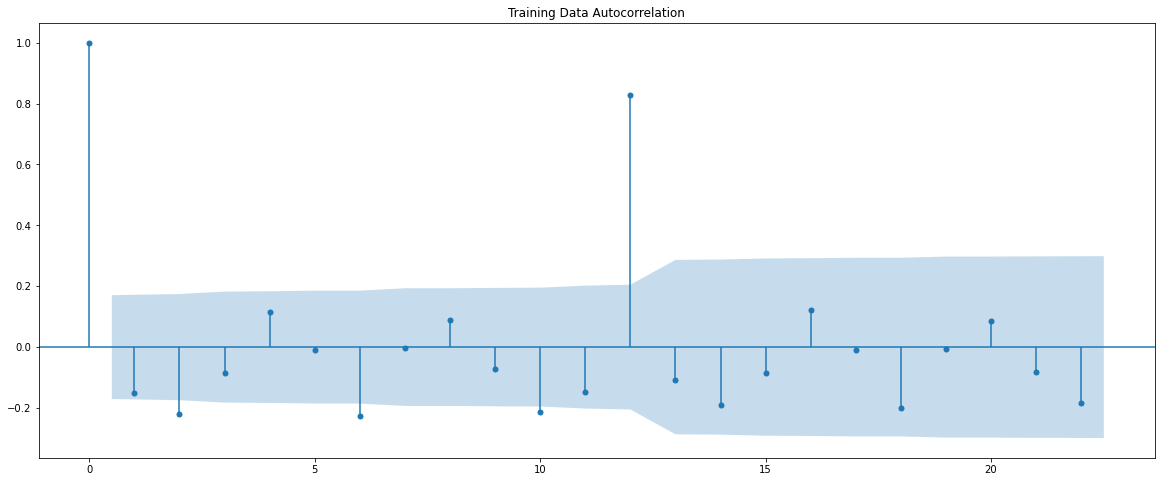

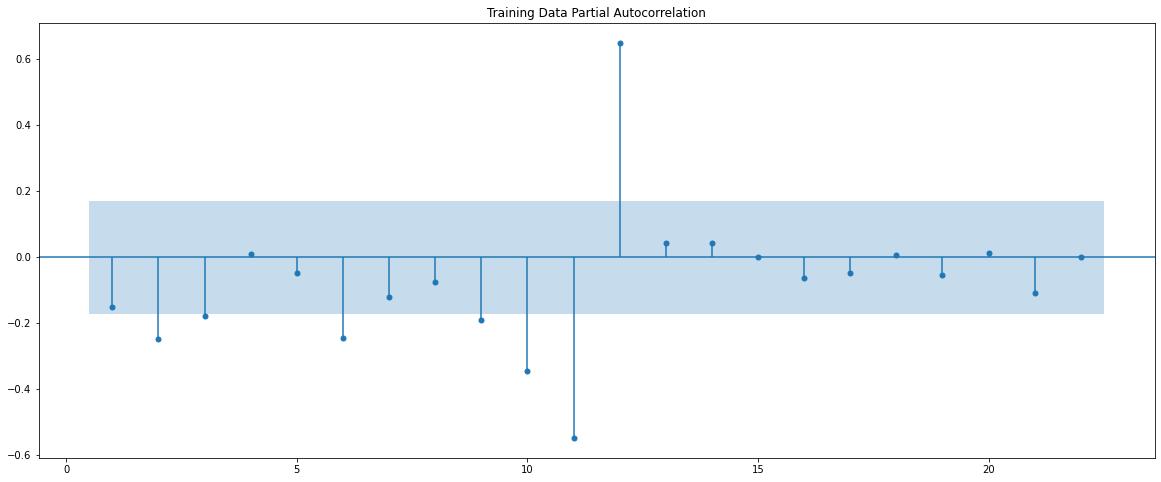

In [122]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [123]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3,1,3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -1070.887
Date:                Sun, 04 Apr 2021   AIC                           2155.775
Time:                        14:14:04   BIC                           2175.684
Sample:                    01-31-1980   HQIC                          2163.864
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3554      0.140      2.537      0.011       0.081       0.630
ar.L2         -0.9352      0.062    -14.998      0.000      -1.057      -0.813
ar.L3          0.3664      0.123      2.972      0.0

C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


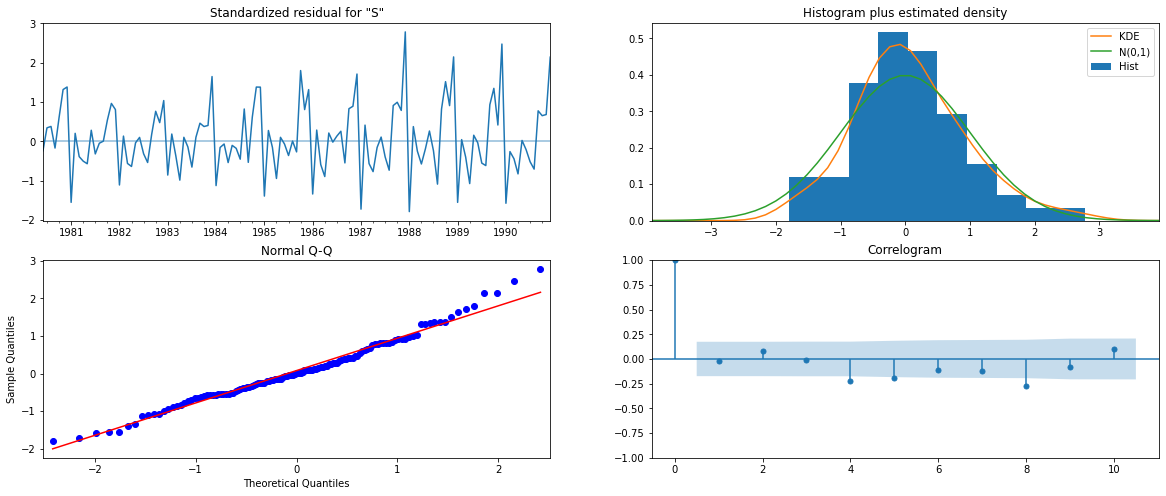

In [124]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [125]:
## Predict on the Test Set using this model and evaluate the model.

In [126]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [127]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1286.652409071143 
MAPE: 45.434850908934486


In [128]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1299.979211,47.099937
"SARIMA(1,1,3)(3,0,3,6)",874.058604,38.903577
"SARIMA(3,1,3)(0,0,3,6)",1286.652409,45.434851


### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.


In [129]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.012144


In [130]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.012144
"Alpha=1,Beta=0.0189:DES",3949.993290


In [131]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.012144
"Alpha=1,Beta=0.0189:DES",3949.993290
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",378.626002


In [132]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1338.012144
"Alpha=1,Beta=0.0189:DES",3949.993290
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",378.626002
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",407.125505


In [133]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf 

,Test RMSE
RegressionOnTime,1275.867052


In [134]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352


In [135]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,1275.867052
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.


#### Building the most optimum model on the Full Data.


In [139]:
full_data_model = sm.tsa.statespace.SARIMAX(data['Sparkling'],
                                order=(1,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\amjur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood               -1208.702
Date:                           Sun, 04 Apr 2021   AIC                           2439.404
Time:                                   14:25:57   BIC                           2473.502
Sample:                               01-31-1980   HQIC                          2453.246
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7118      0.307     -2.320      0.020      -1.313      -0.110
ma.L1         -0.2321      0.330     -0.703


### Evaluate the model on the whole data and predict 12 months into the future 

In [140]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [141]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1832.602947,374.750700,1098.105072,2567.100823
1995-09-30,2407.090960,380.355296,1661.608278,3152.573642
1995-10-31,3284.654438,380.360451,2539.161653,4030.147222
1995-11-30,4027.373767,382.537565,3277.613915,4777.133618
1995-12-31,6290.552440,382.676965,5540.519372,7040.585508


In [142]:
rmse = mean_squared_error(data['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 563.3485314068848


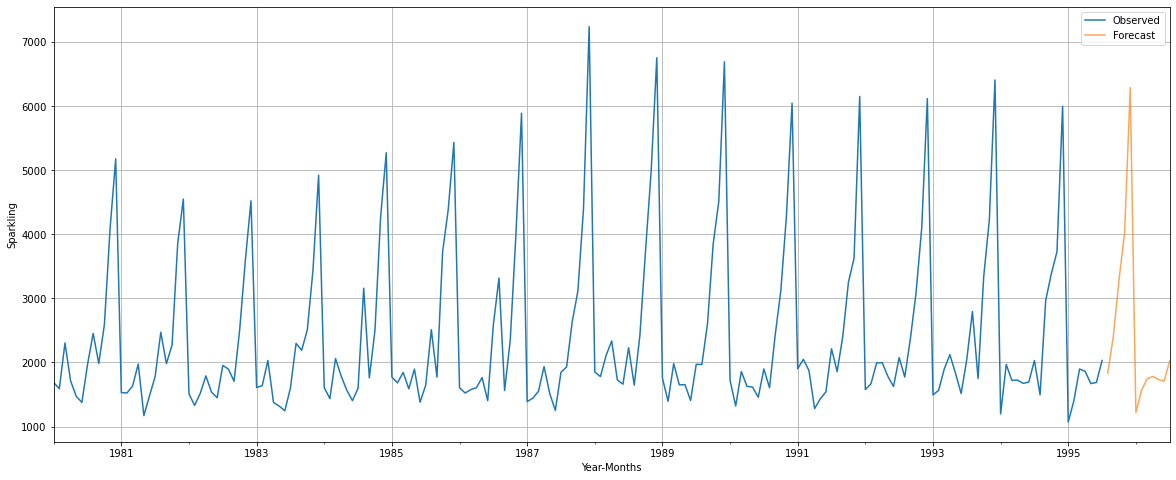

In [143]:
axis = data['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();